<!-- <font size=6>Investigating biases in droplet number concentration 
due to averaging of raw satellite observations and their relation to homogeneity</font>
<br><br> -->

<font size=3>Report for eScience/FORCeS Winter School Tjärnö, Sweden 2020</font> 

<font size=5>Iris Papakonstantinou-Presvelou</font>

<font size=4.8>i.presvelou@uni-leipzig.de</font>

<font size=3>Group 8, Assistant: Tom Goren</font>

<!-- <font size=3>20 November 2020</font><br> -->


# Abstract

The reduction of resolution in data is a really interesting topic, while it can affect the results in many ways and give us a false interpretation of the physical world. Bias due to retrievals can be transferred into the results and get amplified with aggregation when the resolution is reduced. On the other hand, data directly at coarser resolutions might be less accurate and thus, bias the results. Which way is the best to deal with data in different resolutions is not very clear yet, giving us motivation to investigate the bias due to resolution change a bit more. Here, we are looking into a specific cloud quantity, the cloud droplet number concentration $N_d$. The importance of $N_d$ is broadly known in literature while it is used to quantify the effective radiative forcing due to aerosol-cloud interactions. Therefore, deep research into the biases in $N_d$ is of particular importance. In this report we examine the relation between the bias in droplet number concentration and resolution, as well as its connection with different homogeneity conditions. What our results show is that the bias in $N_d$ tends to be more negative when the resolution is coarsened. Also, the hypothesis that the more homogeneous regions present a smaller bias with decreasing resolution is not confirmed.

# Introduction 

Clouds constitute an significant component of the climate system and they greatly contribute to the Earth's radiation budget. In order to describe and understand their behavior we need to know some important quantities; first how many cloud droplets there are inside a cloud, how much liquid water it contains and what is the temperature of its cloud top. These are translated accordingly into the cloud droplet number concentration $N_d (cm^{-3})$, the cloud water content or alternatively the liquid water path LWP $(g/m^2)$, meaning the intergrated cloud water inside the cloud and the temperature of the top T (K). The $N_d$ is a very important quantity, because it constitutes an indicator of the aerosol impact to clouds (Grosvenor et al., 2018). Changing aerosol populations will have a great effect on $N_d$, providing more CCN that can form more smaller cloud droplets, causing the cloud albedo to increase (Twomey, 1974). $N_d$ is also connected to macrophysical quantities, such as the cloud height, depth and fraction, but also to key processes like precipitation and evaporation (entraintment). Because of this interdependence of $N_d$ and important cloud quantities, $N_d$ is vastly used to quantify the effective radiative forcing by aerosol-cloud interactions.


At the moment, $N_d$ cannot directly be retrieved by passive satellite observations, but can rather be estimated using a very simple method that needs the cloud optical thickness and the cloud droplet effective radius. This method requires some assumptions to be fullfilled, that are the $N_d$ to be constant with height and the cloud water to be a constant fraction of its adiabatic value This appears to be relatively valid for warm stratocumulus clouds. According to Grosvenor et al., 2018, the droplet number concentration $N_d$ can be calculated through the following formula:

\begin{equation}
N_d = \frac{\sqrt{5}}{2 \pi k} \big(\frac{f_{ad} c_w \tau_c}{Q_{ext} \rho_w r_e^5}\big)^{\frac{1}{2}} \label{eq:1} \tag{1}
\end{equation}


where $r_e$ the cloud effective radius, k the fraction of the volume-mean droplet radius $r_v$ and $r_e$, $f_{ad}$ the constant fraction of adiabatic value of liquid water L, $c_w$ the rate of increase of liquid water with height, $\tau_c$ the cloud optical thickness, $Q_{ext}$ the extinction efficiency factor and $\rho_w$ the density of liquid water. The most distinct fact about this formula is that the effective radius is raised to a power of -5/2, while all the other factors are raised to -1/2 or -1. That means that the $N_d$ is more sensitive to $r_e$ and thus, errors in the retrieval of $r_e$ will be significantly impact the $N_d$ as well.


When dealing with global model data, the resolutions available are usually coarse (>100km). On the other hand, satellite data can be found at very fine resolutions (~1km). In order to validate the models we have to compare with observational datasets and for that reason the latter should be aggregated into coarser grids. The process of aggregation itself rises some biases in statistical quantities due to smoothing of the data (McComiskey and Feingold, 2012). By decreasing the resolution with aggregation the heterogeneities are lost and therefore the whole area appears to be more homogeneous than before. Consequently, it is expected that homogeneous regions are more likely to be accurately represented after aggregation. In this report, we are trying to understand what is the effect in the droplet number concentration's bias due to aggregation and how it is affected dependent on the homogeneity conditions.



# Data & Methodology

The data used for this analysis come from the MODIS Aqua Cloud L2 collection 6.1 product at 1km resolution (Platnick et al., 2015). We studied random days in 2010, 2014 and 2019, which concern closed stratocumulus cells over ocean (marine Sc). The reason for this choice is because of their abundance and high albedo, they determine at a great extent the effective radiative forcing due to aerosol-cloud interactions (Christensen et al., 2016). Given the cloud effective radius $r_e$ and the cloud optical thickness $\tau$ provided by the satellite, we calculated the cloud droplet number concentration $N_d$ using equation (1). 

In order to eliminate biases that come from other sources (such as retrieval errors), we applied some filters to the data before calculations. First of all, in order to address only liquid clouds we set the cloud top temperature to be higher than 273K. Additionally, we excluded any values with optical thickness less than 5, meaning omitting optically thin clouds, because it has been shown that they affect the $r_e$ retrieval's bias (Goren et al., 2018). Because of this correlation of $r_e$ bias with low $\tau$ values, we also excluded values with small effective radii ($r_e$<5$\mu m$). The focus was on single-layer stratocumulus clouds in order to eliminate any interactions with higher layers of the clouds. 

We divided the areas into smaller regions comprised of 100X100 pixels (100$km^2$) each. We were interested at the ones with a very high mean cloud fraction (cf>=0.99), so as to limit the analysis to the mostly cloud-covered regions. Each region was coarsened successively to 5,10,20,25,50 and 100km resolution (see Appendix) and the mean values of the droplet number concentrations of the region were compared with their respective value at 1km. Thus, the bias in Nd was calculated via the formula: 
\begin{equation}
bias_{Nd} = {\frac{Nd_{coarser}-Nd_{1km}}{Nd_{1km}}*100} \label{eq:2} \tag{2}
\end{equation}


In order to determine how homogeneous a region is, we used the mean and standard deviation of the liquid water path (LWP) over each 100X100km region, which is defined by the following formula: 

\begin{equation}
homogeneity = \frac{std(LWP_{1km})}{mean(LWP_{1km})} \label{eq:3} \tag{3}
\end{equation}

The formula was calculated only for the finest resolution 1km (being the most accurate) and considered for all lower resolutions as the measure of homogeneity. 


In the following pages, all the important packages and functions for this report are presented. 

#### Packages

In [79]:
import glob
import numpy as np
import xarray as xr
from osgeo import gdal
xr.set_options(display_style='html')
import statsmodels.api as sm

from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Functions

In [80]:
def calculate_Nd_adjust(re, tau, T=None, P=None, f_ad=None):

    """
    Calculates the droplet number concentration (Nd), given the cloud optical
    thickness (tau) and cloud effective radius (re). 
    """
    
    # Input: re [um], tau,, optional: T[K], P[Pa] and adiabatic fraction [0-1]
    # Output: Nd [#/cm^-3]
    # @Tom Goren (tom.goren@mail.huji.ac.il)
    
    # calculating Cw based on T and P
    T = T or 275
    P = P or 95000
    
    Qext = 2            
    ro_w = 997*10**3     #[gr*m^-3]
    
    g = 9.81
    Cp = 1004 # [J/kg K]
    ro_a = 1.2 # air density [kg/m3]
    Lv =  2.5 * 10**6 # latent heat of vaporization [J/kg]
    gamma_d =g/Cp
    f_ad = f_ad or 0.8 # Adiabatic fraction
    
    Cw = f_ad * ((ro_a * Cp * (gamma_d - sat_lapse_rate(T, P)) / (Lv)) * 1000)  # eq 14 from Grosvenor 2018 [gr*m^-4]
    gamma = ((5**0.5)/(2*np.pi*0.8)) * (Cw/(Qext*ro_w))**0.5

    N = (gamma * tau ** 0.5 * (re * (1e-6)) ** (-5. / 2)) * 1e-6

    return(N) 

def sat_lapse_rate(T,p):
    
    """ 
    Calculates the lapse rate.
    """
    
    # @Tom Goren (tom.goren@mail.huji.ac.il)
    
    g = 9.81 
    H = 2501000
    ep = 0.622
    Rsd = 287
    cpd = 1003.5
    
    return g * (1 + ((H * ep * es(T)) / (Rsd * (p - es(T)) * T))) / (cpd + ((H ** 2 * ep ** 2 * es(T)) / (Rsd * (p - es(T)) * T ** 2)))


In [81]:
def es(T):
    
    """ 
    Calculates the saturation vapor pressure (es). 
    """
    
    es = np.exp(54.84 - 6763.22/T - 4.21*np.log(T) + 0.00037*T + np.tanh(0.0415*(T-218.8)) *(53.878 - 1331.22/T - 9.44523*np.log(T) + 0.014025*T))
    
    return es 


In [82]:
def read_hdf4(file, varnames):
    
    """ 
    Reads HDF4 files via GDAL and returns a merged xarray Dataset.
    """

    ld = []
    fname_list = get_subdataset(file, varnames)
    
    for fname in fname_list:
        ds = gdal.Open(fname)
        if ds is None:
            raise RuntimeError(f"Could not open subdataset: {fname}")
        arr = ds.ReadAsArray()
        
        # Ensure 3D array with a band dimension
        if arr.ndim == 2:
            arr = arr[None, :, :]
        elif arr.ndim != 3:
            raise ValueError(f"Unexpected array shape {arr.shape} for {fname}")
        
        nband, ny, nx = arr.shape
        data = xr.DataArray(
            arr,
            dims=["band", "y", "x"],
            coords={"band": np.arange(1, nband + 1), "y": np.arange(ny), "x": np.arange(nx)},
            name=fname.split(':')[-1],
        )
        ld.append(data.to_dataset())
        
    return xr.merge(ld)

def get_subdataset(file, varnames):
    
    g = gdal.Open(file)
    subdatasets = g.GetSubDatasets()
    l = []
    for varname in varnames:
        l.extend(  [s[0] for s in subdatasets if varname in s[0].split(':')[-1]  ])
    return l


In [83]:
def coarsen_image(da, avg_window_size=10,  boundary='trim'):
    
    """ 
    Coarsens an xarray.DataArray based on the averaging window size.
    """
    
    return da.coarsen(x=avg_window_size, y=avg_window_size, boundary=boundary).mean(skipna=True)


In [84]:
def slice_image(da, x0, x1, y0, y1):
    
    """ 
    Slices an xarray.DataArray based on Along_Swath and Across_Swath    
    x0, x1 : Across_Swath lower and upper bound
    y0, y1 : Along_Swath lower and upper bound 
    """
    
    return da.where((((da.y >= y0) & (da.y <= y1)) & 
                        ((da.x >= x0) & (da.x <= x1))), drop=True)


In [85]:
def store_cloud_data(filename, var1, var2, var3):
    
    """ 
    Reads the hdf file and extracts the following information:
    - cloud fraction (cf)
    - cloud top temperature
    - cloud effective radius (reff)
    - cloud optical thickness (tau)
    - cloud water path (lwp)
    - cloud multi layer flag 
    - cloud mask 
    """
    
    # store info into 3 datasets in respect to their dimensions
    ds1 = read_hdf4(filename, var1)
    ds2 = read_hdf4(filename, var2)
    ds3 = read_hdf4(filename, var3)
    
    # get dimensions
    dim_x_fine = ds2['x'].values
    dim_y_fine = ds2['y'].values
    dim_band = ds2['band'].values
        
    # store variables
    cf = ds1['Cloud_Fraction']
    top_temp = ds1['Cloud_Top_Temperature']
    reff = ds2['Cloud_Effective_Radius']
    tau = ds2['Cloud_Optical_Thickness']
    lwp = ds2['Cloud_Water_Path']
    multi_layer = ds2['Cloud_Multi_Layer_Flag']
    cld_mask_init = ds3['Cloud_Mask_1km'][:,:,0]
    
    # choose only marine clouds 
    cld_mask_copy = np.where((cld_mask_init==57) | (cld_mask_init==41), 1, 0)
    
    # add 1 extra dimension to match the other variables
    cld_mask_copy_newdim = np.expand_dims(cld_mask_copy, axis=0)
    
    # create dataarray with correct dimensions
    cld_mask = xr.DataArray(name='Cloud_Mask_1km', data=cld_mask_copy_newdim, dims=['band','y','x'], coords=[ [1], dim_y_fine, dim_x_fine ] )
    
    del cld_mask_copy, cld_mask_copy_newdim, cld_mask_init
    
    return dim_x_fine, dim_y_fine, cf, top_temp, reff, tau, lwp, multi_layer, cld_mask


In [86]:
def ignore_missing(top_temp, reff, tau, lwp):
    
    """ 
    Set all missing values to NaNs in order to be ignored.
    """
    
    # missing values
    missing_t = -32768
    missing = -9999
    
    # ignore missing values of temperature
    top_temp = top_temp.where(top_temp!=missing_t)
    
    # ignore missing values of reff
    reff = reff.where(reff!=missing)
   
    # ignore missing values of reff
    tau = tau.where(tau!=missing)
    
    # ignore missing values of LWP
    lwp = lwp.where(lwp!=missing)
    
    return top_temp, reff, tau, lwp


In [87]:
def interpolation_from_5km_to_1km(dimx, dimy, cf, t):
    
    """ 
    Changes the coordinates of 5km resolution grid to 1km resolution grid
    and interpolates the values to the new grid. 
    """
    
    # first change position of x,y
    cf_coords = cf.assign_coords(y = (cf.y-0.5)*5, x = (cf.x-0.5)*5) 
    t_coords = t.assign_coords(y = (t.y-0.5)*5, x = (t.x-0.5)*5) 
    
    # then interpolate
    cf_interp = cf_coords.interp(x = dimx, y = dimy) 
    t_interp = t_coords.interp(x = dimx, y = dimy) 
    
    del cf, t, cf_coords, t_coords
    
    return cf_interp, t_interp


In [88]:
def scaling_variables(reff, tau, cf_interp, top_temp_interp):
    
    """ 
    Scales the variables according to scaling factors and add_offset in the hdf file. 
    """
    
    scale_factor = 0.00999999977648258
    add_offset = -15000

    ####### correct reff ########
    reff = reff*scale_factor
    
    ######## correct tau #######
    tau = tau*scale_factor
    
    ########## correct cloud fraction ########
    cf = cf_interp*scale_factor
    
    ########### correct T ##############
    top_temp = (top_temp_interp-add_offset)*scale_factor
    
    del top_temp_interp, cf_interp

    return reff, tau, cf, top_temp


In [89]:
def filtering(cld_mask, tau, reff, lwp, cf, top_temp, multi_layer):
    
    """
    Filters all values for tau>5 (not very thin clouds, low tau can produce errors in LWP calculation and can affect re bias),
    cld_mask==1 (marine clouds over ocean), top_temp>273K (warm clouds), reff>5um, multi_layer=1 (single layer clouds)
    """

    # tau<5 has a high uncertainty of error in LWP calculation and re bias is correlated with low tau values
    
   # create a general mask for all variables
    gen_mask = xr.where( (tau>5) & (cld_mask==1) & (top_temp>273) & (reff>5)  & (multi_layer==1), cld_mask, 0) #& (cf>0.99)
 
    tau = xr.where(gen_mask==1, tau, np.nan)
 
    reff = xr.where(gen_mask==1, reff, np.nan)
 
    lwp = xr.where(gen_mask==1, lwp, np.nan)
 
    top_temp = xr.where(gen_mask==1, top_temp, np.nan)
 
    del top_temp, multi_layer, cld_mask, gen_mask
    
    return tau, reff, lwp, cf


In [90]:
def divide_in_100X100km_regions(dimx, dimy, reff, tau, lwp, cf):
    
    """ 
    Cuts a single image/file into several subregions, 100X100km each. 
    Selects the regions that have a mean cloud fraction of >=0.95/0.99. 
    """
    
    reg = 100
    int_dim_x = int(len(dimx)/reg)*reg
    int_dim_y = int(len(dimy)/reg)*reg
   
    reff_reg = []
    tau_reg = []
    nd_reg = []
    lwp_reg = []

    ct = 0
    # each list element is an xarray dataset
    for i in range(0,int_dim_x,reg+1):
        for j in range(0,int_dim_y,reg+1):
        
            cf_now = slice_image(cf, i+2, i+2+reg, j+2, j+2+reg) 
        
            # filter values in respect to the mean cloud fraction of the whole region
            cf_regmean = cf_now.mean(skipna=True)
            
            if cf_regmean>=0.99:
                
                reff_now = slice_image(reff, i+2, i+2+reg, j+2, j+2+reg)
                tau_now = slice_image(tau, i+2, i+2+reg, j+2, j+2+reg)
                lwp_now = slice_image(lwp, i+2, i+2+reg, j+2, j+2+reg)
            
                nd_now = calculate_Nd_adjust(reff_now, tau_now)
        
                reff_reg.append(reff_now)
                tau_reg.append(tau_now)
                lwp_reg.append(lwp_now)
                nd_reg.append(nd_now)
                
                ct+=1
    
    del tau, reff, lwp, cf
    
    return reff_reg, tau_reg, nd_reg, lwp_reg, ct


In [91]:
def coarsening_and_regional_mean(resol, nresol, nreg, nd_reg_fine, lwp_reg_fine, reff_reg_fine, tau_reg_fine):
    
    """ 
    First coarsens the resolution for each region.
    Then, calculates the regional mean of nd, lwp (and std) and reff for each region and resolution. 
    """
    
    nd_coarse_regmean = np.nan*np.zeros((nreg, nresol))
    lwp_coarse_regmean = np.nan*np.zeros((nreg, nresol))
    lwp_coarse_regstd = np.nan*np.zeros((nreg, nresol))
    reff_coarse_regmean = np.nan*np.zeros((nreg, nresol))

    for r in range(nreg):
        for i in range(nresol):
    
            # for the finest resolution
            if i == 0:
                lwp_coarse_regmean[r,0] = lwp_reg_fine[r].mean(skipna=True)
                lwp_coarse_regstd[r,0] = lwp_reg_fine[r].std(skipna=True)
                nd_coarse_regmean[r,0] = nd_reg_fine[r].mean(skipna=True)
                
            else:
                lwp_reg_coarse = coarsen_image(lwp_reg_fine[r], resol[i])
                reff_reg_coarse = coarsen_image(reff_reg_fine[r], resol[i])
                tau_reg_coarse = coarsen_image(tau_reg_fine[r], resol[i])
                nd_reg_coarse = calculate_Nd_adjust(reff_reg_coarse, tau_reg_coarse)

                lwp_coarse_regmean[r,i] = lwp_reg_coarse.mean(skipna=True)
                lwp_coarse_regstd[r,i] = lwp_reg_coarse.std(skipna=True)
                nd_coarse_regmean[r,i] = nd_reg_coarse.mean(skipna=True)
                reff_coarse_regmean[r,i] = reff_reg_coarse.mean(skipna=True)
                
    
    return nd_coarse_regmean, lwp_coarse_regmean, lwp_coarse_regstd, reff_coarse_regmean


In [92]:
def calculate_bias_nd_and_homogeneity(nresol, nreg, nd_regmean, lwp_regmean, lwp_regstd):
    
    """ 
    1. Calculates the bias in nd ((coarse_resolution-1km_resolution)/1km_resolution)*100%
    for each region and resolution.
    2. Calculates a measure in homogeneity stdLWP(1km)/meanLWP(1km) for each region.
    """
    
    bias = np.nan*np.zeros((nreg, nresol))
    homog = np.nan*np.zeros((nreg))
    
    for r in range(nreg):
        for i in range(nresol):
            
            bias[r,i] = (nd_regmean[r,i]-nd_regmean[r,0])*100/nd_regmean[r,0]
            
        homog[r] = lwp_regstd[r,0]/lwp_regmean[r,0]    

    return bias, homog


In [96]:
def save_info_to_nc(file, resol, nresol, nreg, bias, homog, nd_regmean, lwp_regmean, reff_regmean):
    
    """ 
    Saves all necessary information to netcdf files.
    """
    
    filename = (file.split('/')[-1]).split('.hdf')[0]
    
    # open ncout file for writing
    output_file = f'../data/processed/{filename}_processed.nc'
    ncout = Dataset(output_file, 'w', format='NETCDF4')
    
    # create dimensions for ncout file
    reg_dim = ncout.createDimension('reg', nreg)
    resol_dim = ncout.createDimension('resol', nresol)
    
    # create variables for ncout file
    region = ncout.createVariable('reg', np.int64, ('reg',))
    resolution = ncout.createVariable('resol', np.int64, ('resol',))
    
    bias_nd = ncout.createVariable('bias_nd', np.float32, ('reg','resol'))
    homogeneity = ncout.createVariable('homog', np.float32, ('reg',))
    nd_mean = ncout.createVariable('nd_mean', np.float32, ('reg','resol'))
    lwp_mean = ncout.createVariable('lwp_mean', np.float32, ('reg', 'resol'))
    reff_mean = ncout.createVariable('reff_mean', np.float32, ('reg', 'resol'))
    
    # write units
    region.units = '-'
    resolution.units = 'km'
    bias_nd.units = '%'
    homogeneity.units = '-'
    nd_mean.units = '#/cm^3'
    lwp_mean.units = 'g/m^2'
    reff_mean.units = 'um'
    
    region.long_name = 'number of region starting from 1'
    resolution.long_name = 'resolution in km [1, 5, 10, 20, 25, 50, 100]'
    bias_nd.long_name = 'bias in Nd in specific region and resolution'
    homogeneity.long_name = 'measure of homogeneity stdLWP/meanLWP in finer resolution (1km)'
    nd_mean.long_name = 'mean value of Nd in specific region and resolution'
    lwp_mean.long_name = 'mean value of LWP in specific region and resolution'
    reff_mean.long_name = 'mean effective radius in specific region and resolution'
                                   
    region[:] = np.arange(1, nreg+1, 1)
    resolution[:] = resol[:]
    bias_nd[:,:] = bias[:,:]
    homogeneity[:] = homog[:]
    nd_mean[:,:] = nd_regmean[:,:]
    lwp_mean[:,:] = lwp_regmean[:,:]
    reff_mean[:,:] = reff_regmean[:,:]
    
    ncout.close()
    

#### Preprocessing <br>


The following code uses all of the above functions, in order to perform some necessary checks in the values. The steps are explained shortly here:

**Steps:**

1. Read information from each file.
2. Ignore missing values.
3. Change coordinates and interpolate cloud fraction and cloud top temperature from 5km grid into 1km.<br>
_This step was needed because the satellite doesn't provide the information for all variables in the finest grid (1km). The more homogeneous variables such as the cloud fraction and the cloud top temperature, which do not have so many variations in space, are provided in a coarser grid (5km)._
4. Scale variables with appropriate scale factors according to HDF4 files (when needed). <br>
_The python package used here doesn't automatically perform necessary adjustments to the values and therefore we have to do it._
5. Apply filters to the values (see Data & Methodology).
6. Divide into random regions of 100X100km.
7. Coarsen the resolution for each region and calculate mean regional values of $N_d$, LWP.
9. Calculate bias in $N_d$ and measure of homogeneity.
10. Save information into new netcdf files.


In [108]:
from pathlib import Path

# Use paths relative to the notebook directory
path1 = Path("..") / "data" / "closed"
path2 = Path("..") / "data" / "open"
path3 = Path("..") / "data" / "disorganized"

fileset1 = sorted(p.as_posix() for p in path1.rglob("*.hdf"))
fileset2 = sorted(p.as_posix() for p in path2.rglob("*.hdf"))
fileset3 = sorted(p.as_posix() for p in path3.rglob("*.hdf"))
fileset = fileset1 + fileset2 + fileset3

varnames1 = [ 'Cloud_Fraction', 'Cloud_Top_Temperature']
varnames2 = ['Cloud_Effective_Radius', 'Cloud_Optical_Thickness', 'Cloud_Water_Path', 'Cloud_Multi_Layer_Flag']
varnames3 = ['Cloud_Mask_1km']

resolutions = [1,5,10,20,25,50,100] 
nresolutions = len(resolutions)

total_num_regions = 0

# loop
for f in fileset:
    
    # read file and store data
    dimx, dimy, cf, top_temp, reff, tau, lwp, multi_layer, cld_mask = store_cloud_data(f, varnames1, varnames2, varnames3)
    
    # ignore missing values
    top_temp, reff, tau, lwp = ignore_missing(top_temp, reff, tau, lwp)
    
    # interpolation
    cf_int, top_temp_int = interpolation_from_5km_to_1km(dimx, dimy, cf, top_temp)

    # scaling
    reff, tau, cf, top_temp = scaling_variables(reff, tau, cf_int, top_temp_int)

    # filtering
    tau, reff, lwp, cf = filtering(cld_mask, tau, reff, lwp, cf, top_temp, multi_layer)

    # cut region in 100X100km random subregions
    reff_1km_reg, tau_1km_reg, nd_1km_reg, lwp_1km_reg, nregions = divide_in_100X100km_regions(dimx, dimy, reff, tau, lwp, cf)
    
    # if it contains no region that fullfill the criteria
    if nregions == 0:
        continue
        
    total_num_regions += nregions
    
    # coarsening and find regional means
    nd_all_regmean, lwp_all_regmean, lwp_all_regstd, reff_all_regmean = coarsening_and_regional_mean(resolutions, nresolutions, nregions, nd_1km_reg, lwp_1km_reg, reff_1km_reg, tau_1km_reg)
    
    # calculate bias nd and measure of homogeneity
    bias_nd, meas_homog =  calculate_bias_nd_and_homogeneity(nresolutions, nregions, nd_all_regmean, lwp_all_regmean, lwp_all_regstd)
    
    # save to external file bias[regions, resolutions], homogeneity[regions], nd_regmean[regions, resolutions], lwp_regmean[regions, resolutions], reff_regmean[regions, resolutions]
    save_info_to_nc(f, resolutions, nresolutions, nregions, bias_nd, meas_homog, nd_all_regmean, lwp_all_regmean, reff_all_regmean)


# Results

In this section, the main results of this report are presented, which will be later analysed in the section Discussion.

#### Read final netcdf files

In [109]:
files_nc = [file for file in glob.glob( "../data/processed/*.nc", recursive=True)]
nfiles = len(files_nc)

i = 0
for f in files_nc:
   
    data = Dataset(f, 'r')
    data_nd = np.array(data['nd_mean'])
    data_lwp = np.array(data['lwp_mean'])
    data_bias = np.array(data['bias_nd'])
    data_homo = np.array(data['homog'])
    data_reff = np.array(data['reff_mean'])
    
    if i==0: 
        nd_means = data_nd
        lwp_means = data_lwp
        reff_means = data_reff
        biases = data_bias
        homogeneities = data_homo
    else:
        nd_means = np.concatenate((data_nd, nd_means), axis=0)
        lwp_means = np.concatenate((data_lwp, lwp_means), axis=0)
        reff_means = np.concatenate((data_reff, reff_means), axis=0)
        biases = np.concatenate((data_bias, biases), axis=0)
        homogeneities = np.concatenate((data_homo, homogeneities), axis=0)
        
    data.close()
    i+=1
    

#### Set Plotting Fonts

In [100]:
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('font', size=20)

#### Plot Nd-bias with decreasing resolution

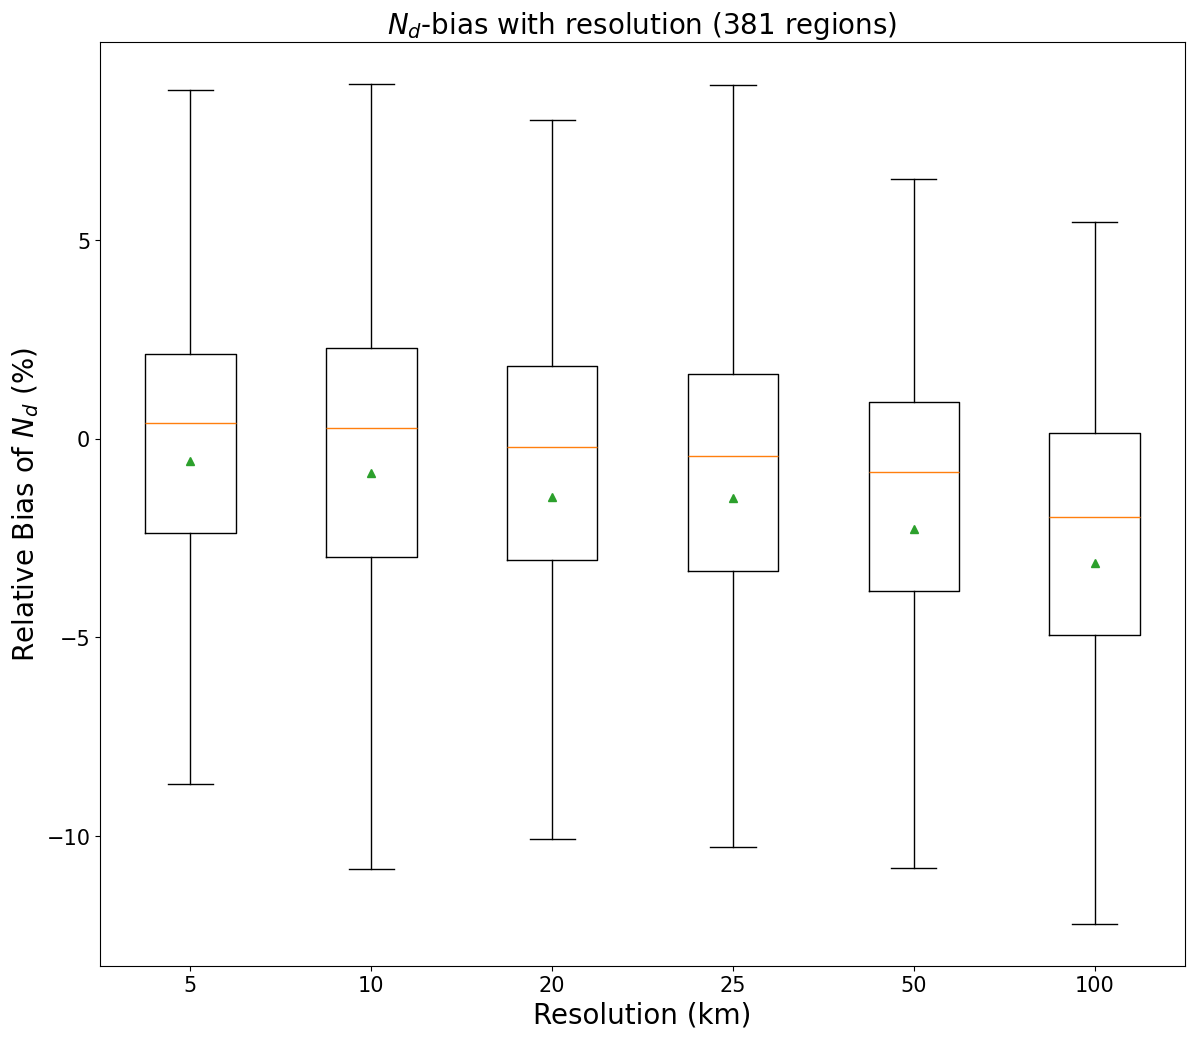

In [110]:
data = []
for i in range(1,nresolutions):
    
    filtered_data = biases[:,i][~np.isnan(biases[:,i])]
    data = data + [filtered_data]

total_num_regions = len(data[0])

# plotting
fig, ax = plt.subplots(figsize=(14,12))
plt.boxplot(data, showfliers=False, showmeans=True)
ax.set_xticklabels(['5', '10', '20', '25', '50', '100'])
plt.ylabel('Relative Bias of $N_d$ (%)')
plt.xlabel('Resolution (km)')
plt.title('$N_d$-bias with resolution ('+str(total_num_regions)+' regions)')
plt.savefig('bias-nd-boxplots.jpg')


Figure 1: Relation between bias in the droplet number concentration ($N_d$) and resolution. The boxplots have been created using 881 values, one for each region. The whiskers show the difference between the 3rd and the 1st quartile multiplied by 1.5. The mean is represented with a green triangle. <br>


#### Plot Nd-bias with homogeneity

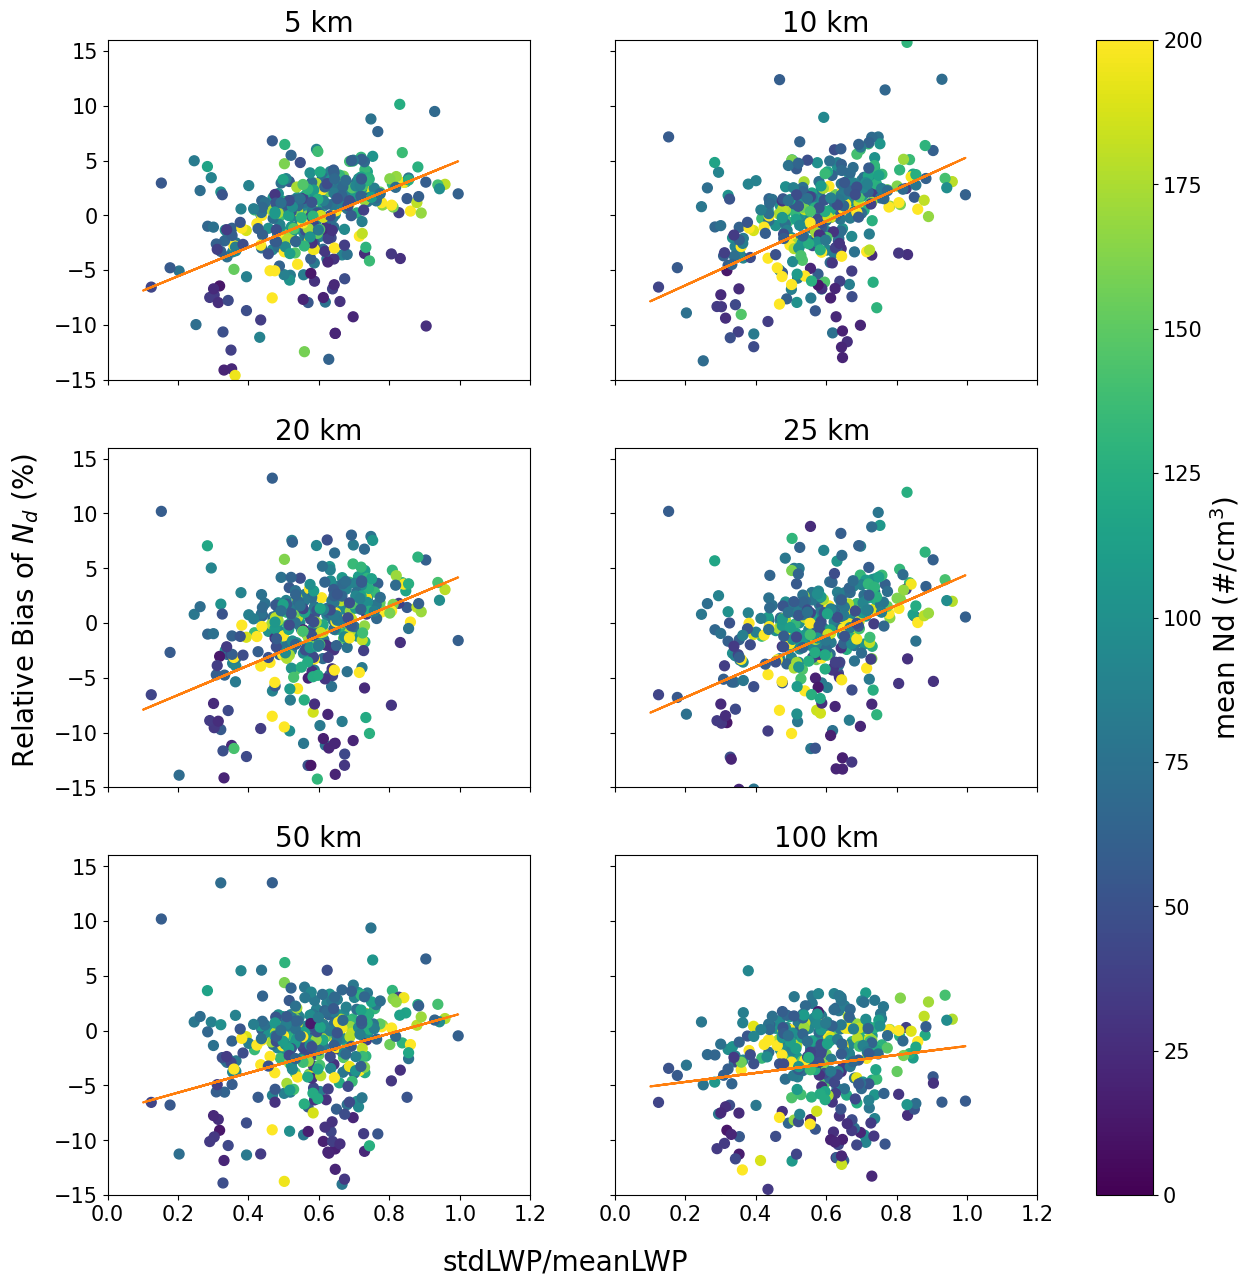

In [111]:
# homogeneous region ==> when std compared to mean is very little, closer to 0
# inhomogeneous region ==> when the values of LWP differ a lot from the mean value of LWP, std larger compared to the mean, closer to 1
    
resolutions = [1,5,10,20,25,50,100] 
nresolutions = len(resolutions)

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,15))

row = [0,0,1,1,2,2]
col = [0,1,0,1,0,1]

#except the 1km resolution
for i in range(1,nresolutions):
    
    axes[row[i-1],col[i-1]].set_title(str(resolutions[i])+ ' km', fontsize=20)
    plot = axes[row[i-1],col[i-1]].scatter(homogeneities[:], biases[:,i], s=50, c=nd_means[:,i], vmin=0, vmax=200)
    
    # linear fit
    X = sm.add_constant(homogeneities[:])
    model = sm.OLS(biases[:,i], X[:], missing='drop')
    results = model.fit()
    slope = results.params[1]
    intercept = results.params[0]
    
    axes[row[i-1],col[i-1]].plot(X[:], slope*X[:]+intercept)
    
plt.yticks(np.arange(-15,16,5))
plt.xticks(np.arange(0,1.3,0.2))
plt.ylim([-15,16])
plt.xlim([0,1.2])  

cb = fig.colorbar(plot, ax=axes[:,:])
cb.set_label('mean Nd (#/cm$^3$)')
fig.text(0.43, 0.06, 'stdLWP/meanLWP', ha='center')
fig.text(0.06, 0.5, 'Relative Bias of $N_d$ (%)', va='center', rotation='vertical')

plt.savefig('bias-nd-with-homogeneity-cb-nd.jpg')

Figure 2: Relation between the bias in droplet number concentration ($N_d$) and homogeneity. Colors show the mean droplet number concentration of each region. <br>


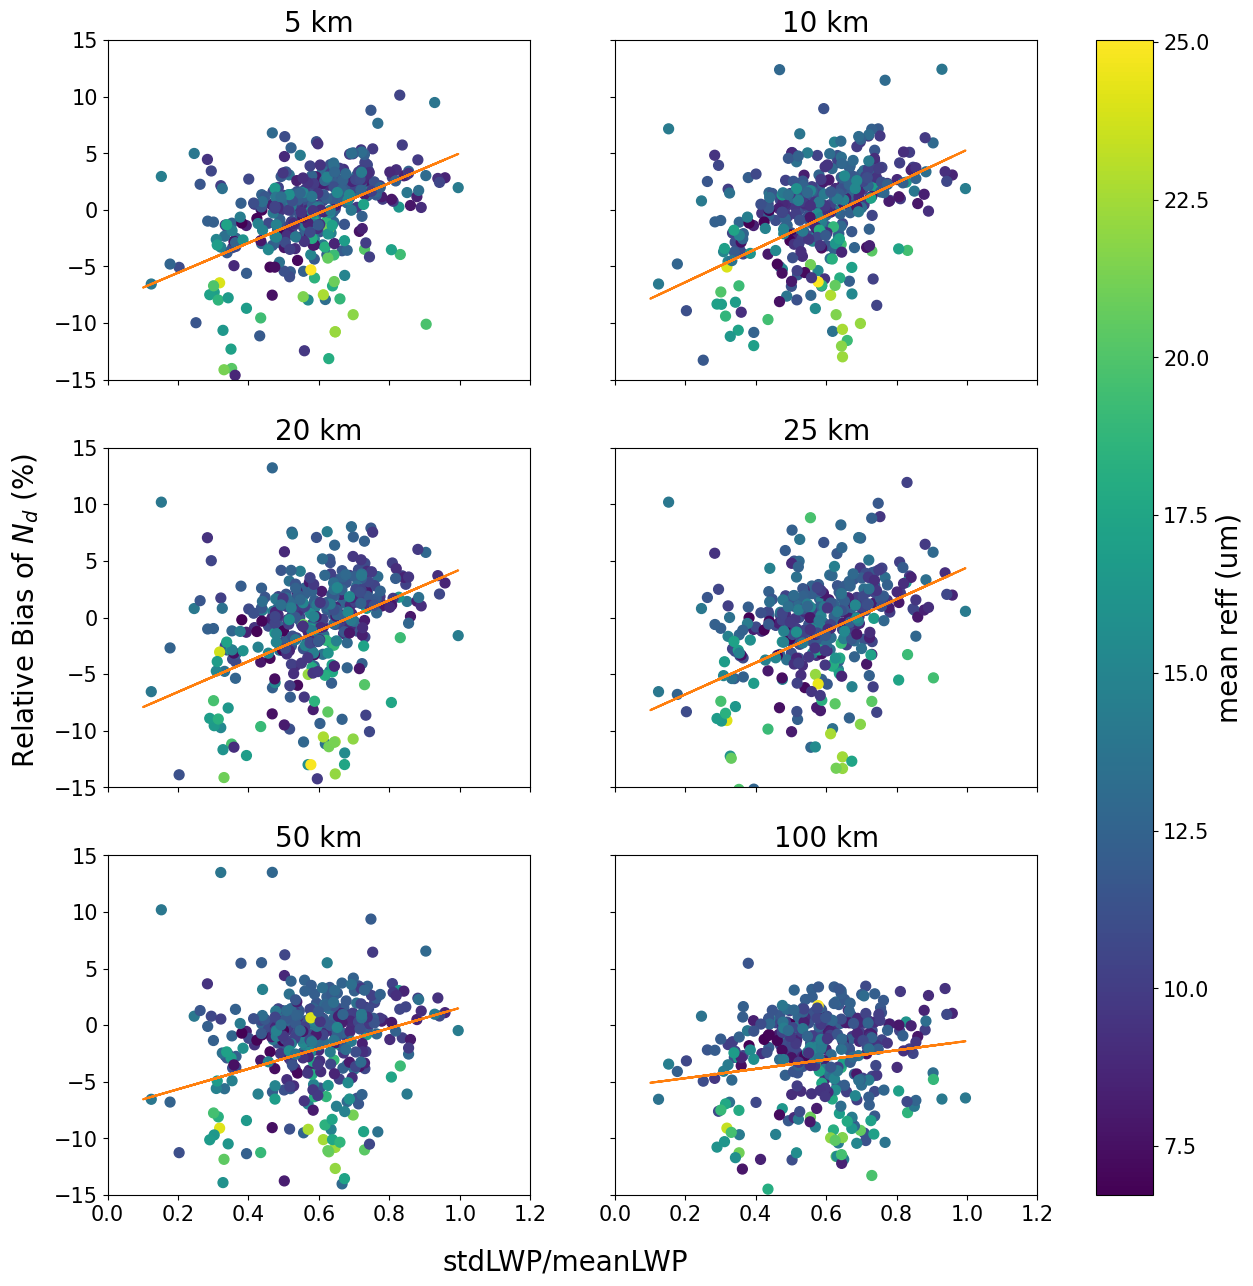

In [112]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,15))

row = [0,0,1,1,2,2]
col = [0,1,0,1,0,1]

#except the 1km resolution
for i in range(1,nresolutions):
    
    #print(row[i],col[i])
    axes[ row[i-1], col[i-1] ].set_title(str(resolutions[i])+ ' km', fontsize=20)
    plot = axes[ row[i-1], col[i-1] ].scatter(homogeneities[:], biases[:,i], s=50, c=reff_means[:,i])
        
    # linear fit
    X = sm.add_constant(homogeneities[:])
    model = sm.OLS(biases[:,i], X[:], missing='drop')
    results = model.fit()
    #print(results.summary)
    slope = results.params[1]
    intercept = results.params[0]
    
    axes[row[i-1],col[i-1]].plot(X[:], slope*X[:]+intercept)

plt.yticks(np.arange(-15,16,5))
plt.xticks(np.arange(0,1.3,0.2))
plt.ylim([-15,15])
plt.xlim([0,1.2])  

cb = fig.colorbar(plot, ax=axes[:,:])
cb.set_label('mean reff (um)')
fig.text(0.43, 0.06, 'stdLWP/meanLWP', ha='center')
fig.text(0.06, 0.5, 'Relative Bias of $N_d$ (%)', va='center', rotation='vertical')

plt.savefig('bias-nd-with-homogeneity-cb-reff.jpg')


Figure 3: Same as before, but here the colors show the mean effective radius of each region. <br>


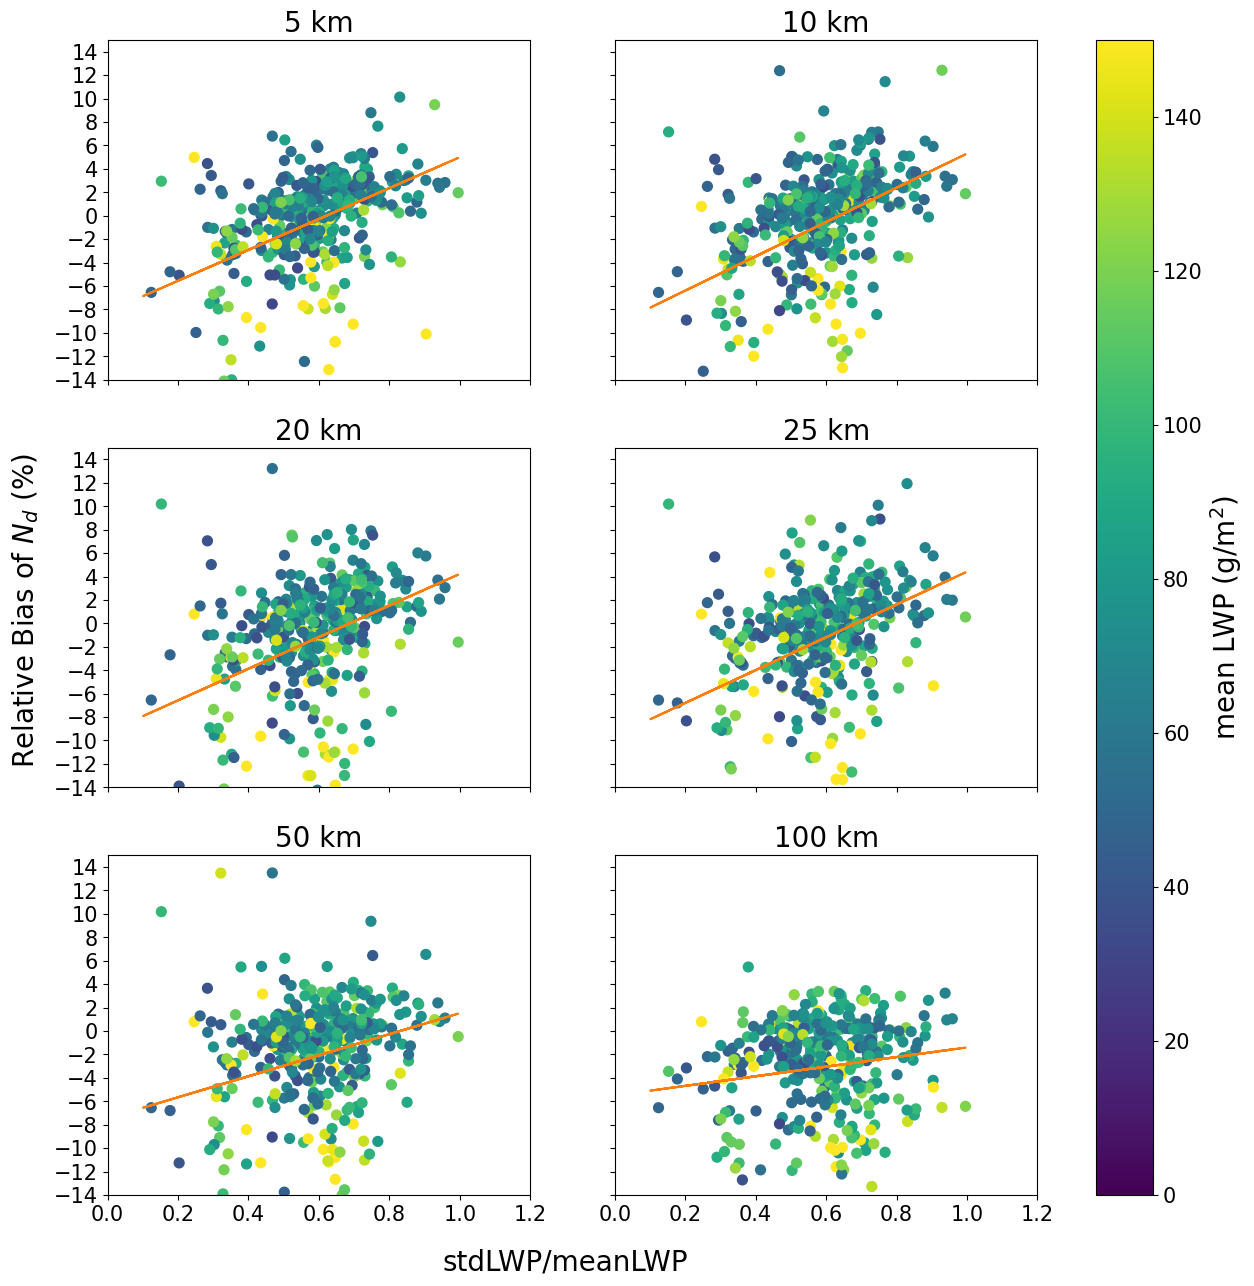

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,15))

row = [0,0,1,1,2,2]
col = [0,1,0,1,0,1]

#except the 1km resolution
for i in range(1,nresolutions):
    
    axes[ row[i-1], col[i-1] ].set_title(str(resolutions[i])+ ' km', fontsize=20)
    plot = axes[ row[i-1], col[i-1] ].scatter(homogeneities[:], biases[:,i], s=50, c=lwp_means[:,i], vmin=0, vmax=150)

    # linear fit
    X = sm.add_constant(homogeneities[:])
    model = sm.OLS(biases[:,i], X[:], missing='drop')
    results = model.fit()
    slope = results.params[1]
    intercept = results.params[0]
    
    axes[row[i-1],col[i-1]].plot(X[:], slope*X[:]+intercept)

plt.yticks(np.arange(-14,15,2))
plt.xticks(np.arange(0,1.3,0.2))
plt.ylim([-14,15])
plt.xlim([0,1.2])  

cb = fig.colorbar(plot, ax=axes[:,:])
cb.set_label('mean LWP (g/m$^2$)')
fig.text(0.43, 0.06, 'stdLWP/meanLWP', ha='center')
fig.text(0.06, 0.5, 'Relative Bias of $N_d$ (%)', va='center', rotation='vertical')

plt.savefig('bias-nd-with-homogeneity-cb-lwp.jpg')


Figure 4: Same as before, but here the colors show the mean liquid water path of each region. <br>


# Discussion

Figure 1 shows the relation between the bias in the droplet number concentration and resolution. For relatively finer resolutions the biases are almost equally divided in negative and positive values, which means that the resolution doesn't really make a difference to the bias. Above 25km, decrease in the resolution shifts the bias to more negative values. Quantitatevely, the bias lies mostly between +10% and -10%, especially for resolutions smaller than 50km and it appears more constrained at the finest resolution, as it was expected.

Figure 2,3 and 4 show how the homogeneity of the region can affect the bias in Nd. Each time a different quantity is plotted in colors in order to see if there is a physical relation between the bias and this quantity. The previous finding that the biases take more negative values in the coarsest resolution (100km) is also evident here. In respect to homogeneity, more values are concentrated in the middle of the graph, between 0.4 and 0.8. When the measure of homogeneity is closer to zero, the more homogeneous the region is, whereas the closer to one it is the more heterogeneous the region is. These results show that it doesn't matter for the amplitude of the bias whether the region is homogeneous or heteregeneous, while in both cases the biases appear large. The pattern is similar for finer resolutions, though less scattered for the finest resolution, showing a positive correlation for resolutions until 25km. For resolutions 50km and above, the correlation is being gradually diminished and at 100km is dampened. As far for the physical relationship with the cloud quantities, it seems that for the droplet number concentration no clear picture exists. On the contrary, it is noticable that the larger the cloud droplets are (larger effective radius) and the more cloud water they include, the bias is increased.

# Conclusions

In conclusion, the bias shifts to more negative values when the resolution decreases. In finer resolutions, less than 25km, there is no such big difference in the distribution of the biases, which lie between +/-10%. Also, larger biases are found for larger cloud droplets and larger quantities of cloud water. Concerning the homogeneity, the hypothesis that the more homogeneous the region is the less bias in the $N_d$ is not confirmed in this study and much work should be done towards this direction.


# References


[1] Twomey, S., 1974: Pollution and planetary albedo. Atmos. Environ.,8,1251–1256. \href{https://climate-dynamics.org/wp-content/uploads/2016/06/twomey74a.pdf}{https://climate-dynamics.org/wp-content/uploads/2016/06/twomey74a.pdf}

[2] McComiskey, A., & Feingold, G. (2012). The scale problem in quantifying aerosol indirect effects. Atmos. Chem. Phys., 12, 1031–1049. \href{https://doi.org/10.5194/acp-12-1031-2012}{https://doi.org/10.5194/acp-12-1031-2012} 


[3] Platnick, S., Ackerman, S., King, M., et al., 2015. MODIS Atmosphere L2 Cloud Product (06_L2). NASA MODIS Adaptive Processing System, Goddard Space Flight Center, USA: http://dx.doi.org/10.5067/MODIS/MYD06_L2.061

[4] Christensen, M. W., Y.-C. Chen, and
G. L. Stephens (2016), Aerosol indi-
rect eﬀect dictated by liquid clouds,
J. Geophys. Res. Atmos., 121, 14,636–
14,650, \href{https://doi.org/10.1002/2016JD025245}{https://doi.org/10.1002/2016JD025245}

[5] Grosvenor, D. P., Sourdeval, O., Zuidema, P., Ackerman, A., Alexandrov, M. D., Bennartz, R., et al. (2018). Remote sensing of droplet number concentration in warm clouds: A review of the current state of knowledge and perspectives. Reviews of Geophysics, 56, 409–453. \href{https://doi.org/10.1029/2017RG000593}{https://doi.org/10.1029/2017RG000593} 


[6] Goren, T., Rosenfeld, D., Sourdeval, O.,
& Quaas, J. (2018). Satellite
observations of precipitating marine
stratocumulus show greater cloud
fraction for decoupled clouds in com-
parison to coupled clouds. Geophysical
Research Letters, 45, 5126–5134.
\href{https://doi.org/10.1029/2018GL078122}{https://doi.org/10.1029/2018GL078122}






# Acknowledgments

I thank the MODIS Atmosphere Science Team for the MODIS/Aqua Cloud Dataset they provided.
I thank our group assistant Tom for the helpful discussions and guidance on the topic. I also thank my two colleagues, Ulrike and Ove, for their important advice and pleasant collaboration throughout the winter school. Last but not least, I thank Paul and Michael that organised the school and made it reality even though in such hard times. 

# Appendix

In this section, the droplet number concentration $N_d$ of a random region is plotted, in order to illustrate the gradual coarsening of the resolution.

In [28]:
# read one file
path = 'shared-ns1000k/Group_8/Iris/'
filename = path+'MYD06_L2.A2014001.2050.061.2018051045823.hdf'

# read file and store data
dimx, dimy, cf, top_temp, reff, tau, lwp, multi_layer, cld_mask = store_cloud_data(filename, varnames1, varnames2, varnames3)
    
# ignore missing values
top_temp, reff, tau, lwp = ignore_missing(top_temp, reff, tau, lwp)
    
# interpolation
cf_int, top_temp_int = interpolation_from_5km_to_1km(dimx, dimy, cf, top_temp)

# scaling
reff, tau, cf, top_temp = scaling_variables(reff, tau, cf_int, top_temp_int)

# filtering
tau, reff, lwp, cf = filtering(cld_mask, tau, reff, lwp, cf, top_temp, multi_layer)

# cut region in 100X100km random subregions
reff_1km_reg, tau_1km_reg, nd_1km_reg, lwp_1km_reg, nregions = divide_in_100X100km_regions(dimx, dimy, reff, tau, lwp, cf)

# store only one region at resolutions 1, 5, and 50km
reff_reg_coarse = coarsen_image(reff_1km_reg[5],5)
tau_reg_coarse = coarsen_image(tau_1km_reg[5], 5)
nd_reg_coarse_5km = calculate_Nd_adjust(reff_reg_coarse, tau_reg_coarse)

reff_reg_coarse = coarsen_image(reff_1km_reg[5],50)
tau_reg_coarse = coarsen_image(tau_1km_reg[5], 50)
nd_reg_coarse_50km = calculate_Nd_adjust(reff_reg_coarse, tau_reg_coarse)

nd_reg_1km = nd_1km_reg[5]


Text(0.08, 0.4, 'Number of pixels')

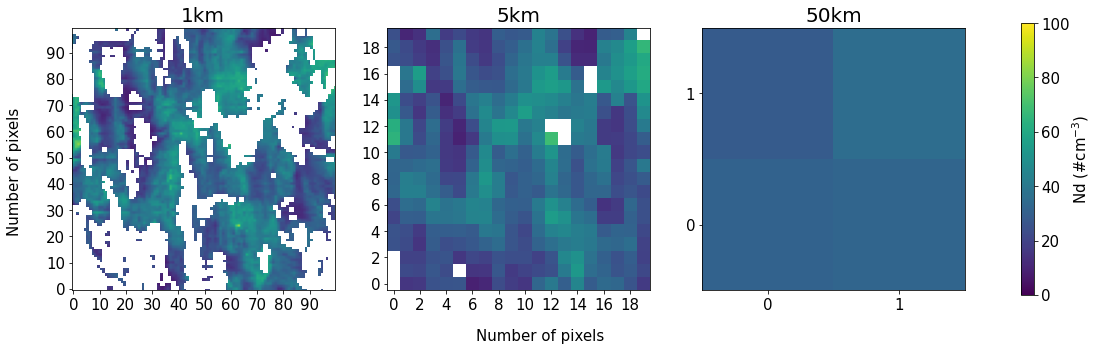

In [31]:
fig, (ax0, ax1, ax2)= plt.subplots(1 ,3, figsize=(20,10), sharex=False, sharey=False)

im1 = ax0.imshow(nd_reg_1km[0],origin='lower', vmin=0, vmax=100)
im2 = ax1.imshow(nd_reg_coarse_5km[0],origin='lower', vmin=0, vmax=100)
im3 = ax2.imshow(nd_reg_coarse_50km[0],origin='lower', vmin=0, vmax=100)

cbar = fig.colorbar(im1, ax=(ax0, ax1, ax2), shrink=0.5)
cbar.set_label('Nd (#cm$^{-3}$)', labelpad=0.5, fontsize=15)


ax0.set_xticks(np.arange(0,100,10)) 
ax0.set_yticks(np.arange(0,100,10)) 
ax1.set_xticks(np.arange(0,20,2)) 
ax1.set_yticks(np.arange(0,20,2)) 
ax2.set_xticks(np.arange(0,2,1)) 
ax2.set_yticks(np.arange(0,2,1)) 

ax0.set_title('1km', fontsize=20)
ax1.set_title('5km', fontsize=20)
ax2.set_title('50km', fontsize=20)

fig.text(0.45, 0.25, 'Number of pixels', fontsize=15, ha='center')
fig.text(0.08, 0.40, 'Number of pixels', fontsize=15, rotation='vertical')

Figure 5: Droplet number concentrations in different resolutions (1km, 5km, 50km).